In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from os import system
res = []
for nbThreads in range(1,9):
    for nbIndis in [32,64,128]:
        # !OMP_NUM_THREADS={nbThread} ./micro_aevol_cpu -w {nbIndis} -h {nbIndis} > /dev/null
        cmd = 'OMP_NUM_THREADS={nbThreads} ./micro_aevol_cpu -w {nbIndis} -h {nbIndis}'.format(nbThreads=nbThreads, nbIndis=nbIndis)
        system(cmd)
        d = pd.read_csv('trace.csv')
        d = d[1:]
        dur_per_gen = d['Duration']
        sum = dur_per_gen.sum()
        res.append([sum, nbThreads, nbIndis])
        print(nbThreads, sum)

In [14]:
res = pd.read_csv('proportional.csv')

In [ ]:
res

<AxesSubplot:xlabel='nbIndis'>

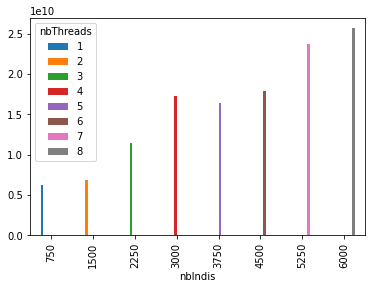

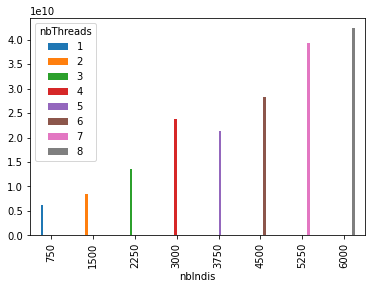

In [15]:
ax = res.pivot(index='nbIndis', columns='nbThreads', values='duration').plot(kind='bar')
res.pivot(index='nbIndis', columns='nbThreads', values='duration_one_thread').plot(kind='bar')